In [1]:
import numpy as np                                                                                                                                                                                  
import xarray as xr                                                                                                                                                                                 
import os                                                                                                                                                                                           
import matplotlib.pyplot as plt                                                                                                                                                                     
import matplotlib.cm as cm    
import matplotlib.pyplot as plt
import numpy as np                                                                                                                                                                                  
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.reset_defaults()
sns.set_context("talk", font_scale=0.8)
import warnings
warnings.filterwarnings('ignore')
import myfuncts 
from myfuncts2  import *
%load_ext autoreload
%autoreload 2
from scipy.ndimage import gaussian_filter1d
                                                                                                                                                                                                    
  

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


### train with AVISO and SWOT+SST

ssh8c_4cnv
swotssh_Unet
swotssh_8c_4cnv
avisossh_8c_4cnv
swotsshsst_8c_4cnv


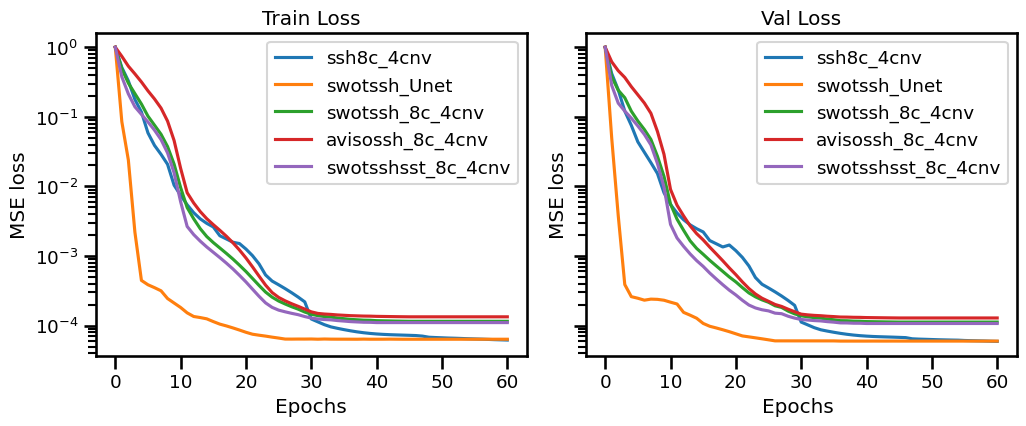

In [45]:

sims=myfuncts.load_tst_noise2()


plt.rcParams["figure.figsize"] = [10.50, 4.50]
norm = 1#.43405532837#sims[0].tloss.values[0]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
for sim in sims:
        ax1.plot((sim.tloss/norm),label=sim.name)
        ax2.plot((sim.vloss/norm),label=sim.name)

ax1.title.set_text('Train Loss')
ax1.set_ylabel('MSE loss')
ax1.set_xlabel('Epochs')
ax1.legend()
ax1.set_yscale('log')


ax2.title.set_text('Val Loss')
ax2.set_ylabel('MSE loss')
ax2.set_xlabel('Epochs ')

ax2.legend()



plt.tight_layout()
plt.show()


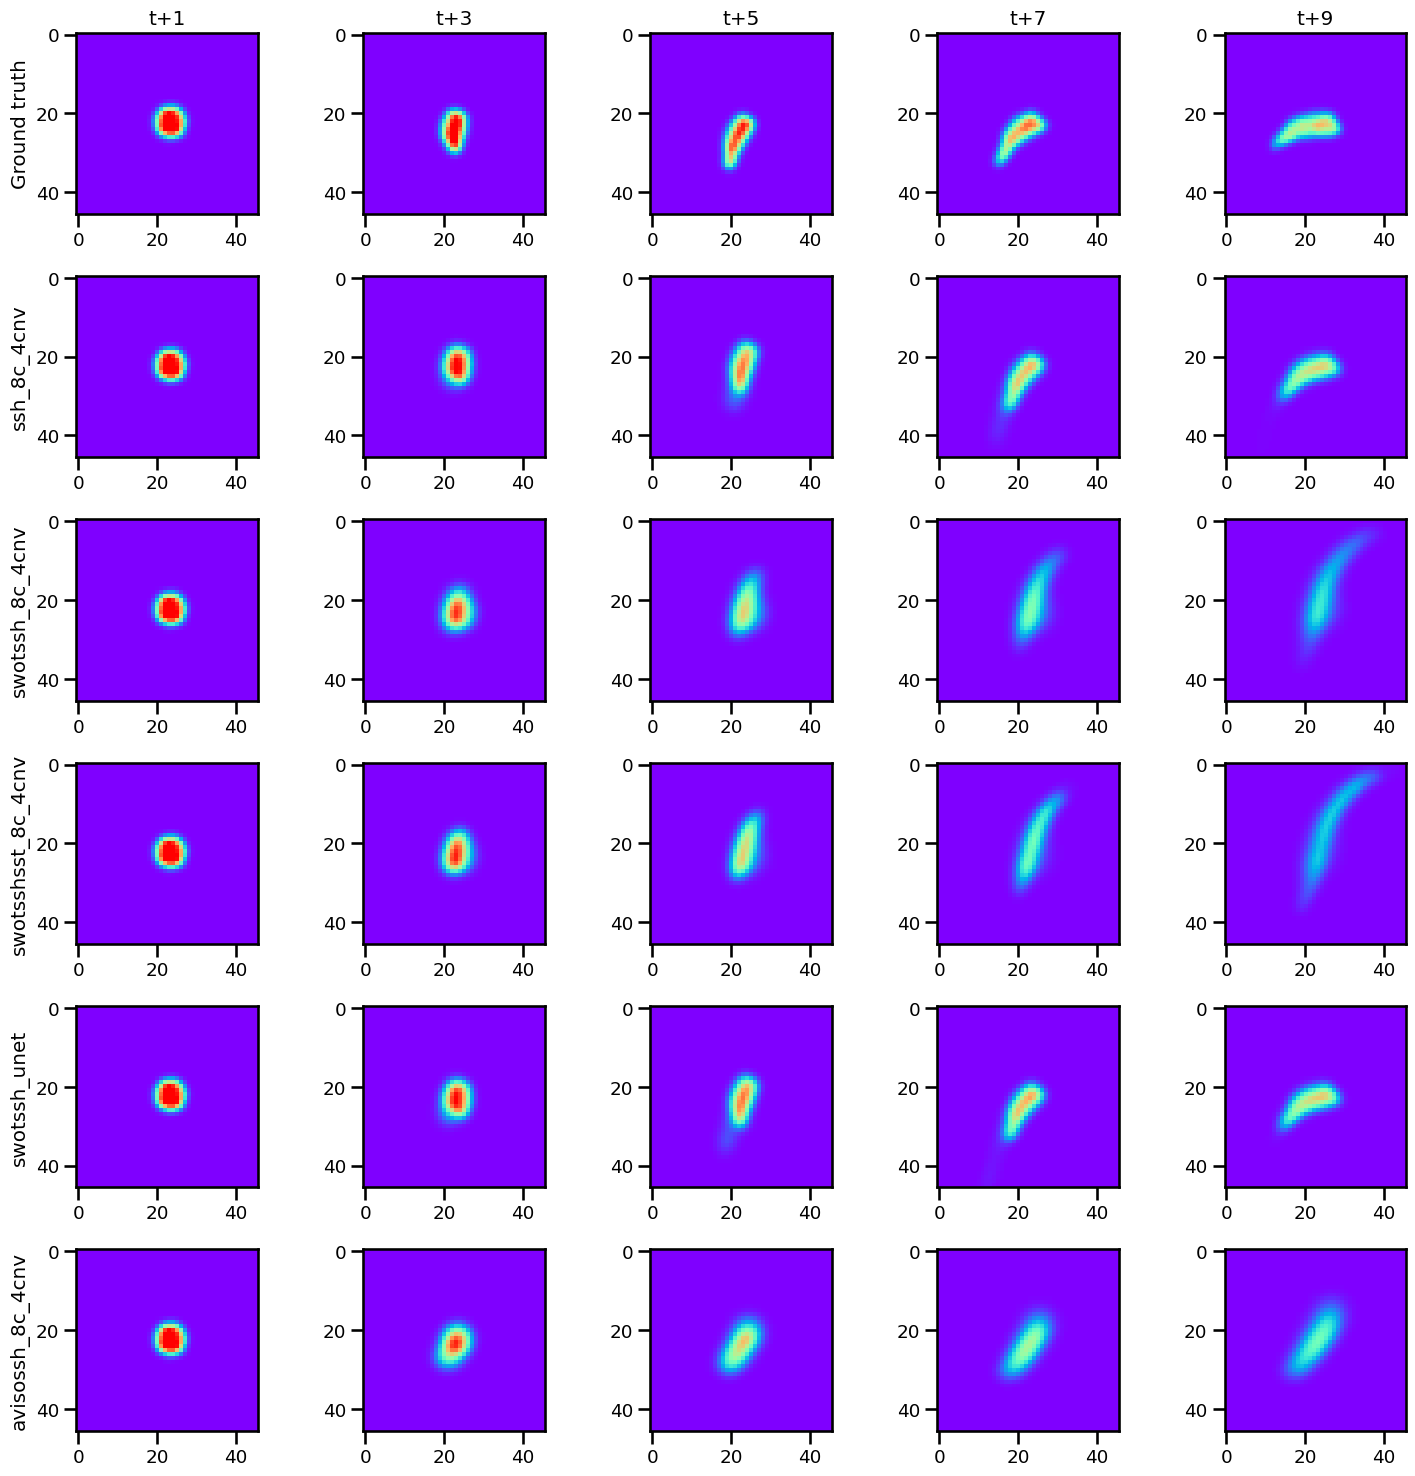

In [69]:
gt, ssh_8c2, unet, swotssh_8c2, avisossh_8c2, swotsshsst_8c2  =myfuncts.load_tst_noiseb2(9)

l=0
k=23

fig, axs = plt.subplots(ncols=5, nrows=6, figsize=(15,15))
axs.shape

vm=0.85
k=23

for j in range(5):
    i=2*j
    ind1 = np.unravel_index(np.argmax(gt[i], axis=None), gt[i].shape)
    ind2 = np.unravel_index(np.argmax(swotssh_8c2[i], axis=None), ssh_8c2[i].shape)
    ind3 = np.unravel_index(np.argmax(ssh_8c2[i], axis=None), ssh_8c2[i].shape)
    ind4 = np.unravel_index(np.argmax(unet[i], axis=None), ssh_8c2[i].shape)
    ind5 = np.unravel_index(np.argmax(avisossh_8c2[i], axis=None), avisossh_8c2[i].shape)
    ind6 = np.unravel_index(np.argmax(swotssh_8c2[i], axis=None), ssh_8c2[i].shape)
    
    axs[0,j].imshow(gt[i,ind1[0]-k:ind1[0]+k,ind1[1]-k:ind1[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[1,j].imshow(ssh_8c2[i,ind3[0]-k:ind3[0]+k,ind3[1]-k:ind3[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[2,j].imshow(swotssh_8c2[i,ind2[0]-k:ind2[0]+k,ind2[1]-k:ind2[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[3,j].imshow(swotsshsst_8c2[i,ind6[0]-k:ind6[0]+k,ind6[1]-k:ind6[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[4,j].imshow(unet[i,ind4[0]-k:ind4[0]+k,ind4[1]-k:ind4[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[5,j].imshow(avisossh_8c2[i,ind5[0]-k:ind5[0]+k,ind5[1]-k:ind5[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)

    axs[0,j].title.set_text('t+' + str(i+1))

axs[0,0].set_ylabel('Ground truth')
axs[1,0].set_ylabel('ssh_8c_4cnv')
axs[2,0].set_ylabel('swotssh_8c_4cnv')
axs[3,0].set_ylabel('swotsshsst_8c_4cnv')
axs[4,0].set_ylabel('swotssh_unet')
axs[5,0].set_ylabel('avisossh_8c_4cnv')

plt.tight_layout()
plt.show()

### score de T1-T9 avec vitesse géostrophique.


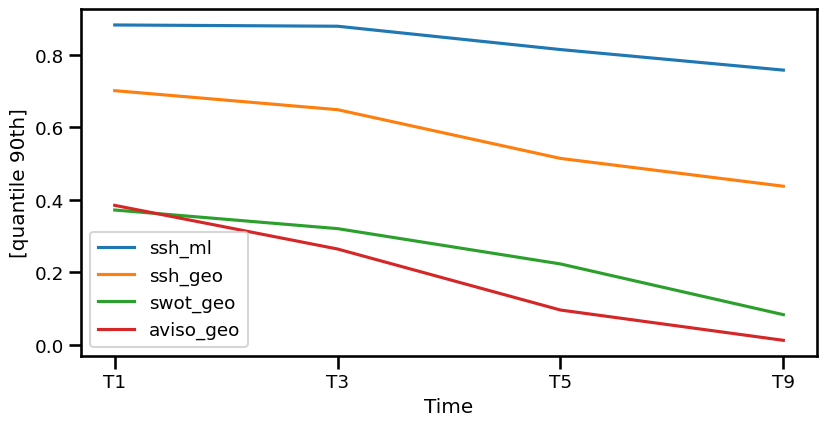

In [102]:
ssh, swot, aviso, geo=myfuncts.load_ssh_geos()


plt.rcParams["figure.figsize"] = [8.50, 4.50]
f, (ax1) = plt.subplots(1, 1, sharey=True)

ax1.plot(ssh,label='ssh_ml')
ax1.plot(geo,label='ssh_geo')
ax1.plot(swot,label='swot_geo')
ax1.plot(aviso,label='aviso_geo')



ax1.set_ylabel('[quantile 90th]')
ax1.set_xlabel('Time')
ax1.legend()
ax1.set_xticks([0,1,2,3])
ax1.set_xticklabels(['T1','T3','T5','T9'])


plt.tight_layout()
plt.show()


### tracer le plot T1-T9 (en particulier pour exp SWOT et AVISO)



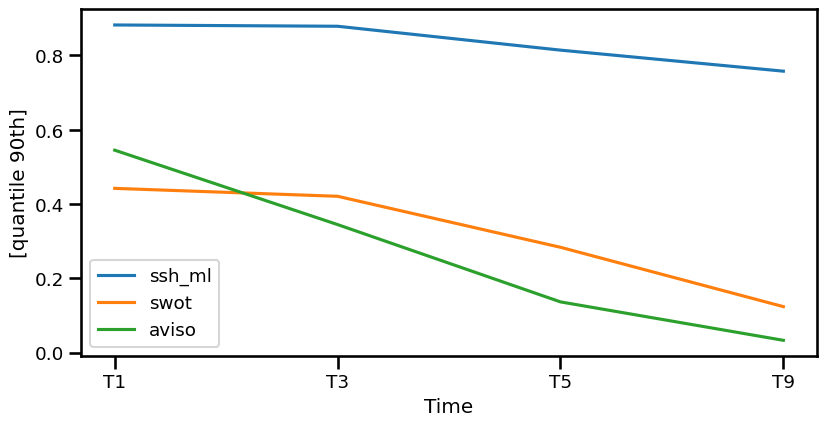

In [103]:
ssh, swot, aviso =myfuncts.load_sshs()


plt.rcParams["figure.figsize"] = [8.50, 4.50]
f, (ax1) = plt.subplots(1, 1, sharey=True)

ax1.plot(ssh,label='ssh_ml')
ax1.plot(swot,label='swot')
ax1.plot(aviso,label='aviso')



ax1.set_ylabel('[quantile 90th]')
ax1.set_xlabel('Time')
ax1.legend()
ax1.set_xticks([0,1,2,3])
ax1.set_xticklabels(['T1','T3','T5','T9'])


plt.tight_layout()
plt.show()
